# 1/13  1. Введение

В этом модуле вы познакомитесь с инструментами, предназначенными для чтения данных, сохранённых в разных форматах, и научитесь записывать подготовленные структуры данных в эти форматы.

Для работы с такими данными нужно не только понимать особенности их структуры, но и уметь использовать специальные инструменты: библиотеки, методы и функции.

# 2/13  2. Работа с текстовыми файлами

#### ИСПОЛЬЗУЕМ ФУНКЦИЮ `READ_TABLE()`

→ Вы уже работали с текстовыми файлами, данные в которых представлены в табличной форме. Это файлы `CSV`. 

* Функция `read_csv()`, как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (`CSV`), в `DataFrame»`.  

* Функция `read_table()` также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('`\t`'). В документации эта функция описана как «Чтение данных из файл значений с разделителями в `DataFrame»`.

Для демонстрации использования функции `read_table()` выполним следующее: 

* используя  функцию `read_csv()`, считаем данные из файла `countries.csv` в переменную `countries_data`, создав объект DataFrame;

* используя уже знакомую функцию `to_csv()`, выгрузим этот DataFrame в файл `countries.txt` (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").

In [8]:
import pandas as pd # Импорт библиотеки pandas: при последовательном выполнении всех примеров ниже импорт библиотеки pandas выполняется один раз.
countries_data = pd.read_csv('/home/denis/Документы/Cource_on_DS/IDE/learning/PANDAS/Introduction_to_Pandas/pd_data/countries.csv', sep=';') # Загружаем данные из файла в переменную, создавая объект DataFrame.
countries_data.to_csv('data/countries.txt', index=False, sep=' ') # Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data

Считаем данные из файла `countries.txt` в переменную `txt_df`  (объект DataFrame), применив функцию `read_table()` с параметрами `sep=' '`  и  `index_col=['country']` (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

In [9]:
txt_df = pd.read_table('data/countries.txt', sep=' ', index_col=['country'])# Загружаем данные из файла в переменную, создавая объект DataFrame.
display(txt_df) # Выводим содержимое DataFrame на экран

,population,square
country,,
Англия,56.29,133396
Канада,38.05,9984670
США,322.28,9826630
Россия,146.24,17125191
Украина,45.50,603628
Беларусь,9.50,207600
Казахстан,17.04,2724902


#### ПРИМЕНЕНИЕ ПАРАМЕТРА HEADER

Используя параметр `header`, при создании DataFrame мы учитываем наличие/отсутствие строки заголовков в исходном файле данных.

Например, если при считывании данных из ранее сохранённого в папке `data` файла `melb_data_ps.csv` указать значение параметра `header=None`, то первая строка исходного файла не будет восприниматься как строка заголовка и будет отнесена к области данных DataFrame:

In [10]:
melb_data = pd.read_csv('/home/denis/Документы/Cource_on_DS/IDE/learning/PANDAS/Introduction_to_Pandas/pd_data/melb_data.csv', header=None) # Загружаем данные из файла в переменную, создавая объект DataFrame.
display(melb_data) # Выводим содержимое DataFrame на экран

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
1,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"-37.7996, 144.9984"
2,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"-37.8079, 144.9934"
3,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,"-37.8093, 144.9944"
4,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1.0,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,"-37.7969, 144.9969"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,2.0,652.0,126.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,"-37.90562, 145.16761"
13577,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,"-37.85927, 144.87904"
13578,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,4.0,436.0,126.0,1997.0,NaN,-37.852740000000004,144.88738,Western Metropolitan,6380.0,"-37.85274, 144.88738"
13579,13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,"-37.85908, 144.89299"


#### РЕШАЕМ ПРОБЛЕМУ С КОДИРОВКОЙ ИСХОДНЫХ ДАННЫХ

Для решения проблемы выполним следующие действия:

* узнаем, какая кодировка символов используется в считываемом файле (для этого обратимся к субмодулю `chardet.universaldetector` библиотеки `Universal Encoding Detector`);  

* при считывании файла и создании DataFrame будем использовать параметр `encoding`  —  указывает, какой тип кодировки символов используется в считываемом файле. 

ЛОКАЛИЗУЕМ ПРОБЛЕМУ

Считываем файл и создаем DataFrame без использования параметра `encoding`:

In [11]:
data=pd.read_csv('data/ErrorEnCoding.csv', header=None, encoding_errors='replace') # Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame.
display(data) # Выводим содержимое DataFrame на экран

,0,1,2
0,User_943,Accumanst@gmail.com,������
1,User_908,Advismowr@mail.ru,������
2,User_962,Anachso@ukr.net,���������
3,User_973,Antecia@inbox.ru,�����
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,������
96,User_901,V2artierso@mail.ru,�����������
97,User_970,Vashoterlo@bk.ru,�������
98,User_965,Visuareda@yahoo.com,�������


Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

ОПРЕДЕЛЯЕМ КОДИРОВКУ ФАЙЛА


Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

In [12]:
from chardet.universaldetector import UniversalDetector # Импортируем субмодуль chardet.universaldetector
detector = UniversalDetector()
with open('data/ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
detector.close()

{'encoding': 'KOI8-R', 'confidence': 0.8402412806602051, 'language': 'Russian'}

С достоверностью примерно 84 % тип используемой в файле кодировки — `koi8-r`. Повторим считывание файла, используя полученные данные.

СЧИТЫВАЕМ ФАЙЛ, УКАЗАВ КОДИРОВКУ

In [13]:
# Создаём DataFrame из файла, явно указав кодировку символов, и выводим его содержимое на экран.
data=pd.read_csv('data/ErrorEnCoding.csv', encoding='koi8-r', header=None )
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,Тюмень
96,User_901,V2artierso@mail.ru,Арзангелтск
97,User_970,Vashoterlo@bk.ru,Воронеж
98,User_965,Visuareda@yahoo.com,Воронеж


#### ЧТЕНИЕ ФАЙЛА ПО ССЫЛКЕ, ИСПОЛЬЗУЯ ФУНКЦИЮ READ_TABLE()

Ранее вы уже считывали данные из файла `melb_data.csv`, который находится в свободном доступе в интернете, используя функцию `read_csv()`. Попробуем использовать функцию `read_table()`, указав в качестве разделителя данных запятую — '`,`'.

In [14]:
data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)# ДОЛГО...

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


Как видим, функция `read_table()` сработала и с `CSV`-файлом — достаточно было указать, какой разделитель используется.

#### ЧТЕНИЕ/ЗАПИСЬ АРХИВИРОВАННЫХ CSV-ФАЙЛОВ

Механизм, используемый в функции `read_csv()`, позволяет проводить чтение текстового файла из архива, не распаковывая его. Функция `read_csv()` сама распознает архив и извлекает из него данные (работает практически со всеми `zip`-архивами). Есть ограничение — файл в `zip`-архиве должен быть один (если файлов в архиве несколько, то можно разархивировать файлы и работать с каждым вне архива. Подробнее об этом поговорим в юните Итоги).

Ранее вы работали с датасетом `students_performance.csv`, упакованным в архив. Для работы с файлом вы предварительно проводили распаковку архива. Попробуем начать работу с файлом, не распаковывая его.



Используя функцию `read_csv()`, загрузите данные из заархивированного датасета  в переменную `data()` и выведите её содержимое на экран, используя приведённый ниже код:

In [15]:
data = pd.read_csv('data/students_performance.zip')
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


В функции `to_csv()` предусмотрен механизм, позволяющий проводить упаковку `CSV`-файлов в `zip`-архив. Проделаем обратную операцию — данные из DataFrame data запишем в `CSV`-файл, упакуем полученный файл в `zip`-архив «`на лету`» и сохраним полученный архив в папке data, выполнив следующий код:

In [16]:
compression_opts = dict(method='zip', archive_name='out.csv') # Определяем параметры архивирования: метод сжатия, имя файла в архиве.
data.to_csv('data/out.zip', index=False, compression=compression_opts)

В ходе выполнения кода содержимое DataFrame сохранено в файле `out.csv`, файл упакован в архив `out.zip`, а архив записан в каталог `data`.

# 3/13  3. Работа с файлами Excel

#### НЕМНОГО ОБ `EXCEL`

→ Excel-файлы представляют из себя таблицы с данными и имеют формат `XLS` или  `XLSX`. В отличие от `CSV`-файлов, которые также позволяют удобно представлять табличные данные, `XLS`- и `XLSX`-файлы могут помимо данных включать формулы, изображения, графики и содержат информацию о форматировании.

Файл `Excel` называется рабочей книгой. Каждая книга может хранить некоторое количество листов. Лист, просматриваемый пользователем в данный момент, называется активным. Лист состоит из столбцов (адресуемых, как правило, с помощью букв, начиная с A) и строк (адресуемых с помощью цифр, начиная с 1). Лист может содержать данные в виде таблиц, формул, изображений, графиков и информации о форматировании.

В этом разделе будут рассмотрены функции `read_excel()` и `to_excel()` из библиотеки pandas. С их помощью можно считывать данные из файлов `Excel` и выполнять запись в них. С помощью различных параметров есть возможность менять поведение функций, создавая нужные файлы, а не просто копируя содержимое из объекта DataFrame.

#### СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА `EXCEL`

Подобно уже хорошо нам известной функции `read_csv()`, в pandas предусмотрена функция для удобного чтения `XLS`- и `XLSX`- файлов: `read_excel()` (англ. читать_Excel). Синтаксис обеих функций практически идентичен.

Попробуем прочитать наш файл-пример. Для этого передадим в `read_excel()` путь к нему. Чтобы его открыть и сохранить данные в переменную `grades`, необходимо выполнить следующий код:

In [17]:
grades = pd.read_excel('data/grades.xlsx')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


Так же, как и `read_csv()`, функция `read_excel()` может принимать на вход не только путь к файлу на компьютере, но и интернет-ссылку на него.

#### СЧИТЫВАНИЕ ДАННЫХ ИЗ ФАЙЛА EXCEL ПО ССЫЛКЕ

Если файл находится в открытом доступе по ссылке (например, на `Google Диске` или `GitHub`), его можно прочитать и из интернета — для этого достаточно в функции `read_excel()` вместо пути до файла указать ссылку на файл. Например:

In [18]:
data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx')
display(data)

,January 2020 Sales,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Global Sales Report,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Location,Oranges,Apples,Bananas,Blueberries,Total
3,Toronto,7651,4422,8580,3679,24332
4,Los Angeles,273,2998,9890,7293,20454
5,Atlanta,3758,6752,4599,4149,19258
6,New York,4019,8796,8486,9188,30489


Основные параметры метода `read_excel()`

* `io` — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.

* `sheet_name` —  ссылка на лист в Excel-файле (возможные значения данного параметра: `0` — значение по умолчанию, загружается первый лист; '`Sheet1`' — можно передать название листа; обычно листы называются '`SheetX`', где `X` — номер листа, но могут использоваться и другие названия; [`0`, `1`, '`Sheet3`'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).

* `na_values` — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).

Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — `Maths` и `ML`.

In [19]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,7
1,2,Катя,5
2,3,Маша,9
3,4,Миша,8
4,5,Женя,9


#### ВЫГРУЗКА ДАННЫХ ИЗ DATAFRAME В EXCEL-ФАЙЛ

После обработки данных (очистка, создание новых признаков и т. д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в `Excel`-файл.

Для этого в pandas есть функция `to_excel()` (рус. в_Excel), принцип работы которой очень схож с функцией `to_csv()`:

In [20]:
grades.to_excel('data/grades_new.xlsx') # Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data

В этом случае будет создан один лист с именем по умолчанию "`Sheet1`". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, `Example`) и не сохранять индекс, в метод  `to_excel()` необходимо передать параметры `sheet_name='Example'` и `index=False`:

In [21]:
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False) # Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data

Продвинутая работа с файлами Excel в Python предполагает использование дополнительных библиотек, таких как:

* `openpyxl` — рекомендуемый пакет для чтения и записи файлов `Excel 2010+` (например, `xlsx`);  

* `xlsxwriter` — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате `Excel 2010+` (например, `xlsx`);  

* `pyxlsb` — пакет позволяет читать файлы `Excel` в `xlsb`-формате;  

* `pylightxl` — пакет позволяет читать `xlsx`- и `xlsm`-файлы и записывать `xlsx`-файлы;  

* `xlrd` — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, `xls`); 
 
* `xlwt` — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, `xls`).

Задание 3.3

Считайте данные из двух листов файла `ratings+movies.xlsx` в разные DataFrame, объедините в один, запишите данные из полученного DataFrame в файл. Сколько строк (включая строку заголовков) в результирующем файле?

In [22]:
ratings = pd.read_excel('data/ratings_movies.xlsx', sheet_name='ratings')
display(ratings)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [23]:
movies = pd.read_excel('data/ratings_movies.xlsx', sheet_name='movies')
display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [24]:
merged = ratings.merge(
    movies,
    on='movieId',
    how='left'
    )
display(merged.shape)
# (100836, 6)
display(merged.head())

(100836, 6)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [25]:
merged.to_excel('data/merged_ratings_movies.xlsx', sheet_name='Example', index=False)
mer = pd.read_excel('data/merged_ratings_movies.xlsx')
display(mer)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


# 4/13  4. JSON. Что это?

→ `JSON` — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как `JavaScript Object Notation`, в переводе на русский — система обозначения/записи объектов `JavaScript`. Несмотря на то, что `JSON` изначально основывался на языке программирования `JavaScript`, он является общепризнанным форматом обмена данными, и многие языки программирования, включая `Python`, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом `JSON` — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак, `JSON` — это простой, структурированный, основанный на использовании текста формат обмена данными.



#### МОДУЛИ ДЛЯ РАБОТЫ С JSON

Для работы с данными в формате `JSON` используется модуль `json` из стандартной библиотеки языка `Python`, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [26]:
import json # Импортируем модуль json

Также нам может быть полезен модуль `pprint`  (от англ. `pretty print`, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция `pprint()`, с помощью которой можно красиво выводить на экран содержимое `JSON-файла`. Для загрузки нужной нам функции перед началом работы выполним следующий код:



In [27]:
from pprint import pprint # Импортируем функцию pprint()

#### КАК ВЫГЛЯДИТ JSON-ФАЙЛ?

Информация в формате `JSON` представляет собой (в закодированном виде) одну из двух структур:

* набор пар "`ключ-значение`", где ключ — это всегда строковая величина (в Python такая структура преобразуется в `словарь`);  

* упорядоченный набор значений (при чтении `JSON-файла` в Python эта структура будет преобразована в `список`).

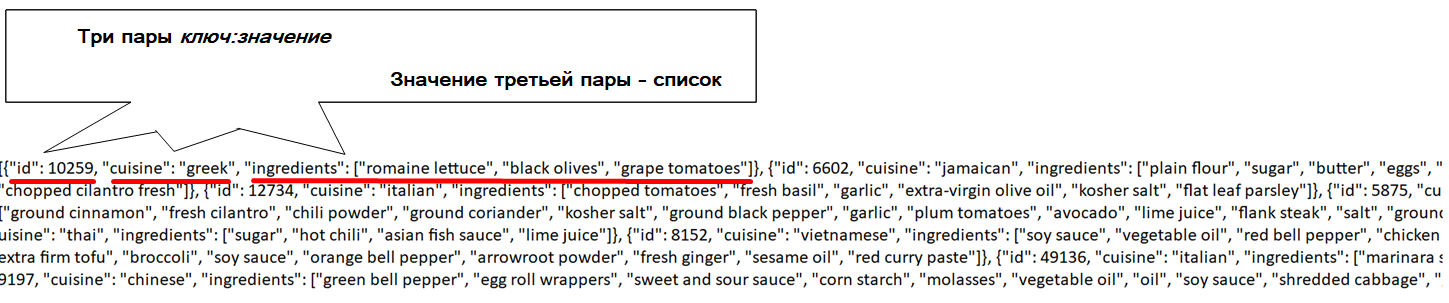

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

# 5/13  5. JSON. Открываем JSON-файл и извлекаем данные

#### ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата `JSON` в формат, который можно обрабатывать инструментами `Python`, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных `Python` в формат `JSON`, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом `load()` (от англ. загрузить) модуля `json`, который принимает на вход ссылку на открытый `JSON-файл`:

In [28]:
with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes

Отлично! Теперь содержимое нашего файла загружено в переменную `recipes`. Давайте выведем его на экран с помощью функции `pprint()` из одноимённого модуля:

✍️ Попробуйте выполнить этот код. Будьте готовы к тому, что данных в наборе много, поэтому в ячейке `Out` (если вы работаете с `Jupyter Notebook`) появится несколько сотен строк.

In [29]:
pprint(recipes) # Выводим на экран содержимое переменной recipes, используя функция pprint().

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

* Ключ "`cuisine`" — обозначает принадлежность блюда к определённой национальной кухне (например, '`greek`', '`southern_us`', '`filipino`' и т. д.);  

* Ключ "`id`" — уникальный идентификационный номер блюда;  

* Ключ "`ingredients`"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

#### ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — `0`, и информация о нём хранится в словаре. Чтобы узнать `ID` этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [30]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс `0`). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. `ID` блюда доступно по ключу '`id`', и мы указываем этот ключ в отдельной паре квадратных скобок:

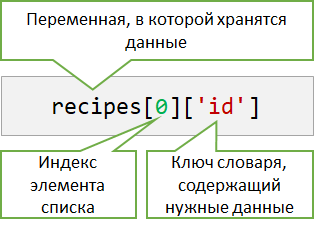

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ '`id`' на '`ingredients`'. 

Задание 5.1

Сколько ингредиентов входят в состав первого блюда из предлагаемого списка?

In [31]:
len(recipes[0]['ingredients'])

9

Мы также можем извлечь информацию о конкретном блюде по его `ID`. Для этого необходимо с помощью цикла, например `for`, перебрать все элементы списка, проверяя ключ '`id`',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

Задание 5.2

К какой кухне относится блюдо с id = 13121?

In [32]:
for i in range(len(recipes)):
    if recipes[i]['id'] == 13121:
        print(recipes[i]['cuisine'])

thai


На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Задание 5.3

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ СПИСКА

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу '`cuisine`' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список `recipes`, не получится применить известный нам метод `unique()` (этот метод неприменим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром.

ВАРИАНТ РЕШЕНИЯ С ИСПОЛЬЗОВАНИЕМ МНОЖЕСТВА

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а множества (`set`). Множество содержит только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда "добавить во множество такое же значение" будет проигнорирована компьютером.

In [33]:
cuisine_set = set()
for i in range(len(recipes)):
    cuisine_set.add(recipes[i]['cuisine'])
print(len(cuisine_set))

20


Задание 5.4

Какой из национальных кухонь принадлежит самое большое количество рецептов?

In [34]:
cuisine_dict = dict()
for i in range(len(recipes)):
    if recipes[i]['cuisine'] not in cuisine_dict.keys():
        cuisine_dict[recipes[i]['cuisine']] = 1
    else:
        cuisine_dict[recipes[i]['cuisine']] += 1
    
count_max = max(cuisine_dict.values())
print(list(cuisine_dict.keys())[list(cuisine_dict.values()).index(count_max)])
cuisine_dict

italian


{'greek': 15,
 'southern_us': 52,
 'filipino': 11,
 'indian': 41,
 'jamaican': 6,
 'spanish': 12,
 'italian': 101,
 'mexican': 79,
 'chinese': 39,
 'british': 9,
 'thai': 17,
 'vietnamese': 9,
 'cajun_creole': 16,
 'brazilian': 3,
 'french': 25,
 'japanese': 24,
 'irish': 9,
 'korean': 21,
 'moroccan': 9,
 'russian': 2}

# 6/13  6. JSON. Работаем с pandas. Из JSON в pandas

#### ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [36]:
import json # Импортируем модуль json
from pprint import pprint # Импортируем функцию pprint()
import pandas as pd # Импортируем модуль pandas

with open('data/recipes.json') as f: # Открываем файл и связываем его с объектом "f"
    recipes = json.load(f) # Загружаем содержимое открытого файла в переменную recipes
df = pd.DataFrame(recipes) # Создаём объект DataFrame из списка recipes
display(df.head()) # Выводим на экран первые строки полученного DataFrame

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


ДОПОЛНИТЕЛЬНО  
Для непосредственного считывания содержимого файла `recipes.json` в переменную `df` (объект DataFrame) используйте функцию `read_json()` (с англ. читать_json).

In [37]:
import pandas as pd # Импортируем модуль pandas
df = pd.read_json('data/recipes.json') # Создаём объект DataFrame, загружая содержимое файла recipes.json.
display(df.head()) # Выводим на экран первые строки полученного DataFrame

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."



Каждая строка соответствует одному рецепту, в столбце `id` хранится его идентификационный номер, в столбце `cuisine` — тип кухни, а столбец `ingredients` содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

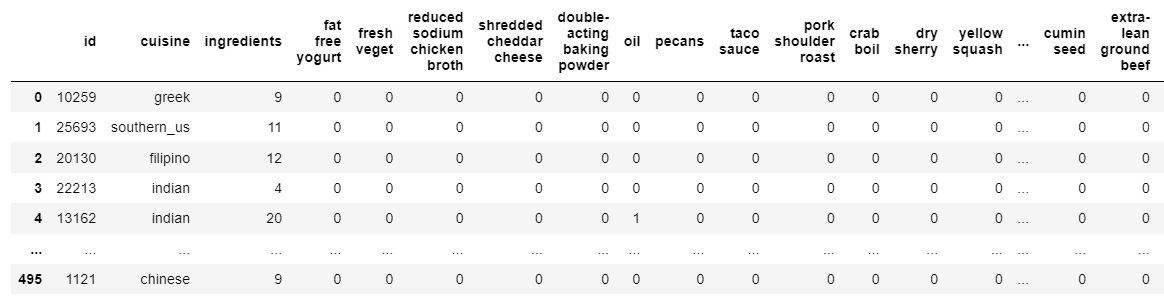

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце `ingredients` для текущего блюда и возвращать `1`, если ингредиент есть в рецепте, и `0`, если он отсутствует.

2. Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу `ingredients` функцию, созданную нами на предыдущем этапе.

Задание 6.4

Создайте реестр уникальных ингредиентов `all_ingredients`, который будет использоваться на втором этапе. Какое количество уникальных ингредиентов в нашем DataFrame?

In [39]:
all_ingredients = set()
for i in df['ingredients']:
    for unit in i:
        all_ingredients.add(unit)

len(all_ingredients)

1318

→ Теперь определим функцию `contains()`, с помощью которой мы будем проверять наличие конкретного ингредиента `ingredient_name` в рецепте текущего блюда, который представлен списком `ingredient_list` (значение в ячейке столбца `ingredients` текущего рецепта).

 Функция будет возвращать `1`, если ингредиент есть в рецепте, и `0`, если он отсутствует:

In [ ]:
def contains(ingredient_list): # Определяем имя функции и передаваемые аргументы.
    if ingredient_name in ingredient_list: # Если ингредиент есть в текущем блюде,
        return 1 # возвращаем значение 1.
    else: # Если ингредиента нет в текущем блюде,
        return 0 # возвращаем значение 0.
    
for ingredient_name in all_ingredients: # Последовательно перебираем ингредиенты в реестре all_ingredients
    df[ingredient_name] = df['ingredients'].apply(contains) # В DataFrame cоздаём столбец с именем текущего ингредиента и заполняем его единицами и нулями, используя ранее созданную функцию contains.

In [42]:
df.head()

,id,cuisine,ingredients,fry mix,chicken wings,chopped pecans,orange,"whole kernel corn, drain",fresh basil,panko breadcrumbs,...,cooked brown rice,spring roll wrappers,cactus pad,orange bell pepper,olive oil flavored cooking spray,kalamata,fresh mushrooms,pasta rotel,1% low-fat milk,medjool date
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра `all_ingredients` с помощью цикла  `for`  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу `ingredients` функцию `contains()`.

В завершение изменим значение столбца `ingredients` — вместо списка ингредиентов в каждом рецепте заполним столбец данными о количестве ингредиентов в нём:

In [43]:
df['ingredients'] = df['ingredients'].apply(len) # Заменяем список ингредиентов в рецепте на их количество 
display(df) # Выводим содержимое полученного DataFrame на экран

,id,cuisine,ingredients,fry mix,chicken wings,chopped pecans,orange,"whole kernel corn, drain",fresh basil,panko breadcrumbs,...,cooked brown rice,spring roll wrappers,cactus pad,orange bell pepper,olive oil flavored cooking spray,kalamata,fresh mushrooms,pasta rotel,1% low-fat milk,medjool date
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Задание 6.5 (External resource)

Напишите код для создания списка `ids` всех блюд, представленных в датафрейме. Нужны только уникальные значения.

Порядок `id` должен совпадать с тем, как они расположены в исходном датафрейме.

Примечание. Не забудьте импортировать библиотеки и прочитать файл `recipes.csv`.

In [44]:
ids = list()
for i in df['id']:
    ids.append(i)

print(ids)

[10259, 25693, 20130, 22213, 13162, 6602, 42779, 3735, 16903, 12734, 5875, 45887, 2698, 41995, 31908, 24717, 34466, 1420, 2941, 8152, 13121, 40523, 40989, 29630, 49136, 26705, 27976, 22087, 9197, 1299, 40429, 34419, 10276, 33465, 39250, 37963, 20051, 11300, 17610, 37405, 28302, 31634, 32304, 36341, 29369, 27564, 18515, 3335, 4499, 4906, 5767, 30748, 35930, 44902, 31119, 3535, 47028, 38112, 2646, 5206, 38233, 39267, 11913, 20591, 70, 43928, 8530, 275, 43769, 49111, 11886, 45839, 699, 24568, 8820, 16582, 9058, 4715, 29061, 2107, 22825, 13758, 6886, 14874, 43399, 38254, 41596, 33989, 17004, 4969, 31831, 46648, 36888, 34471, 25164, 39600, 46357, 46905, 8753, 37337, 17636, 8997, 28851, 4635, 7782, 8031, 49434, 31318, 31027, 47095, 4574, 19757, 35570, 44812, 27858, 18624, 9406, 35132, 33071, 8321, 20955, 45776, 6043, 336, 25751, 793, 34367, 7406, 7473, 7532, 5924, 5802, 41078, 20665, 39471, 9595, 27869, 44776, 17771, 43970, 27165, 11190, 21872, 29853, 1154, 9069, 46975, 4892, 21467, 20919, 4

#### СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в `JSON-формате`, то полезно будет сохранить промежуточный DataFrame в виде `CSV-файла`. Для выполнения этой операции воспользуемся известной нам в Pandas функцией `to_csv()`:

In [45]:
df.to_csv('data/recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра `index` как `False`. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции `read_csv()`.

# 7/13  7. JSON. Работаем с pandas. Из pandas в JSON

#### ИЗ PANDAS В JSON



→ Решим обратную задачу и создадим `JSON-файл` из сохранённого ранее `CSV-файла`, который получили в конце предыдущего этапа. 

Начнём с чтения файла и создания DataFrame на его основе:

In [50]:
df = pd.read_csv('data/recipes.csv') # Создаём DataFrame, читаем данные из файла в переменную df.
df.head()

,id,cuisine,ingredients,fry mix,chicken wings,chopped pecans,orange,"whole kernel corn, drain",fresh basil,panko breadcrumbs,...,cooked brown rice,spring roll wrappers,cactus pad,orange bell pepper,olive oil flavored cooking spray,kalamata,fresh mushrooms,pasta rotel,1% low-fat milk,medjool date
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Мы помним, что после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов входящих в состав блюда.

✍️ Поскольку по условию задачи мы не можем использовать предыдущие наработки, давайте начнём с создания списка, содержащего перечень id всех блюд, а также списка ингредиентов, встречающихся в рецептах. Эти списки в дальнейшем мы будем использовать для заполнения JSON-структуры.

Задание 7.1 (External resource)

Напишите код для создания списка `id` всех блюд, нужны только уникальные значения представленных в DataFrame. Результирующий список занесите в переменную `ids`.

In [49]:
df = pd.read_csv('data/recipes.csv')

ids_1 = set()
ids = list(ids_1)
for line in df['id']:
    if line in ids:
        pass
    
    ids.append(line)
    
print(ids)

[10259, 25693, 20130, 22213, 13162, 6602, 42779, 3735, 16903, 12734, 5875, 45887, 2698, 41995, 31908, 24717, 34466, 1420, 2941, 8152, 13121, 40523, 40989, 29630, 49136, 26705, 27976, 22087, 9197, 1299, 40429, 34419, 10276, 33465, 39250, 37963, 20051, 11300, 17610, 37405, 28302, 31634, 32304, 36341, 29369, 27564, 18515, 3335, 4499, 4906, 5767, 30748, 35930, 44902, 31119, 3535, 47028, 38112, 2646, 5206, 38233, 39267, 11913, 20591, 70, 43928, 8530, 275, 43769, 49111, 11886, 45839, 699, 24568, 8820, 16582, 9058, 4715, 29061, 2107, 22825, 13758, 6886, 14874, 43399, 38254, 41596, 33989, 17004, 4969, 31831, 46648, 36888, 34471, 25164, 39600, 46357, 46905, 8753, 37337, 17636, 8997, 28851, 4635, 7782, 8031, 49434, 31318, 31027, 47095, 4574, 19757, 35570, 44812, 27858, 18624, 9406, 35132, 33071, 8321, 20955, 45776, 6043, 336, 25751, 793, 34367, 7406, 7473, 7532, 5924, 5802, 41078, 20665, 39471, 9595, 27869, 44776, 17771, 43970, 27165, 11190, 21872, 29853, 1154, 9069, 46975, 4892, 21467, 20919, 4

Задание 7.2 (External resource)

Напишите код для создания списка ингредиентов всех блюд, представленных в DataFrame. Результирующий список занесите в переменную `ingredients`.

In [51]:

ingredients = df.columns.tolist()[3:]

    
print(ingredients)

['fry mix', 'chicken wings', 'chopped pecans', 'orange', 'whole kernel corn, drain', 'fresh basil', 'panko breadcrumbs', 'part-skim ricotta cheese', 'kosher salt', 'fresh pineapple', 'meat bones', 'cauliflower florets', 'spinach leaves', 'cane sugar', 'green beans', 'mace', 'mustard greens', 'bourbon whiskey', 'dashi', 'chipotle chile powder', 'fresh basil leaves', 'candied orange peel', 'ground cumin', 'diced tomatoes', 'Fuyu persimmons', 'Johnsonville Andouille Dinner Sausage', 'italian seasoning mix', 'chinese noodles', 'asian pear', 'medium eggs', 'crema', 'grouper', 'long grain white rice', 'vanilla extract', 'grana padano', 'prawns', 'coconut milk', 'peanuts', 'chestnut flour', 'water', 'marinara sauce', 'dried rosemary', 'country ham', 'diced celery', 'coriander', 'potatoes', 'baby bok choy', 'arame', 'sesame paste', 'soba noodles', 'ice water', 'shredded cheese', 'lettuce', 'sliced green onions', 'sweet and sour sauce', 'frozen chopped spinach', 'shiso', 'oyster sauce', 'pepper

→ Отлично! Теперь мы можем использовать подготовленные списки `ids` и `ingredients` для непосредственного создания `JSON-структуры`.

После десериализации `JSON-файла` мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "`ключ-значение`", при этом в качестве значений выступали:

* целое число (`id` блюда);
* строковая величина (тип кухни);
* список строковых величин (перечень ингредиентов).

Сейчас нам предстоит воссоздать эту структуру, извлекая данные из DataFrame. Для этого необходимо создать:

* пустой список `new_recipes` — для хранения итоговой структуры;
* используя код из Задачи 7.1, список `ids` — для хранения `id` всех блюд;
* используя код из Задачи 7.2, список `ingredients` — для хранения названий всех ингредиентов.

✍️ Далее необходимо реализовать следующий алгоритм:

1. Написать код функции `make_list()`, которая принимает на вход строку DataFrame `df`, содержащую полные данные об одном блюде, и возвращает перечень ингредиентов, входящих в состав этого блюда в виде списка.
2. Организовать цикл с параметром, в котором будут перебираться элементы списка `ids`. В результате в процессе прохождения цикла параметр должен принять значение `id` каждого блюда.
3. На каждом шаге цикла создать словарь, содержащий три пары "`ключ-значение`":
* ключу "`id`" присвоить текущее значение параметра цикла как целого числа;
* ключу "`cuisine`" присвоить значение соответствующей кухни, которое мы получим, применив фильтр по текущему `id` к DataFrame `df`;
* ключу "`ingredients`" присвоить значение списка, воспользовавшись функцией `make_list()`, созданной на первом шаге алгоритма.
4. Каждый созданный словарь добавить к списку `new_recipes`:

In [ ]:
# new_recipes = [] # Создаём пустой список для хранения итоговой структуры
# for current_id in ids: # Организуем цикл с параметром current_id
#     cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame.
#     current_ingredients = make_list(df[df['id'] == current_id]) # Получаем перечень ингредиентов, входящих в состав текущего блюда.
#     current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} # Создаём текущий словарь
#     new_recipes.append(current_recipe) # Добавляем созданный словарь к списку

Осталось создать код функции  `make_list()`, выполнить сериализацию и записать результат в файл.

Задание 7.3 (External resource)

Напишите код функции `make_list()`, которая принимает на вход одну строку DataFrame, содержащую данные об одном рецепте, и возвращает перечень ингредиентов этого блюда в виде списка.

Функция `make_list()` должна принимать только один аргумент - `row`. Это будет строка датафрейма.

Не забудьте импортировать необходимые бибилиотеки, считать файл `recipes.csv` и создать список `ingredients`.

In [72]:
import pandas as pd

df = pd.read_csv('data/recipes.csv')



def make_list(row):
    
    ingredients = df.columns.tolist()[3:]
    lst = list()
    for i in ingredients:
        
        if row[i] == 1:
            lst.append(i)
    return lst

make_list(df.iloc[55])

['kosher salt',
 'onion powder',
 'fresh thyme',
 'white vinegar',
 'cayenne pepper',
 'garlic',
 'bread crumbs',
 'all-purpose flour',
 'worcestershire sauce',
 'bay leaves',
 'curry powder',
 'curry',
 'cold water',
 'pepper',
 'pickapeppa sauce',
 'extra-virgin olive oil',
 'ground beef',
 'large eggs',
 'allspice',
 'yellow onion',
 'unsalted butter',
 'low sodium beef broth']

In [80]:
df[df['id'] == ids[5]].iloc[::, 3:]['fry mix']

5    True
Name: fry mix, dtype: bool

In [83]:
int(df[df['id'] == 22213]['fry mix'])

/tmp/ipykernel_5435/1965534126.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(df[df['id'] == 22213]['fry mix'])


0

In [70]:
row = df.iloc[1]
row.index[3]
len(row)
row

id                       25693
cuisine            southern_us
ingredients                 11
fry mix                      0
chicken wings                0
                      ...     
kalamata                     0
fresh mushrooms              0
pasta rotel                  0
1% low-fat milk              0
medjool date                 0
Name: 1, Length: 1321, dtype: object

In [84]:
def make_list(row):
    
    ingredients = df.columns.tolist()[3:]
    lst = list()
    for i in ingredients:
        
        if int(row[i]) == 1:# Future Warning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
#  if int(row[i]) == 1:
            lst.append(i)
    return lst

make_list(row= df[df['id'] == 22213])



/tmp/ipykernel_5435/1944161485.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(row[i]) == 1:


['water', 'wheat', 'salt', 'vegetable oil']

In [85]:
new_recipes = [] # Создаём пустой список для хранения итоговой структуры
for current_id in ids: # Организуем цикл с параметром current_id
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame.
    current_ingredients = make_list(df[df['id'] == current_id]) # Получаем перечень ингредиентов, входящих в состав текущего блюда.
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} # Создаём текущий словарь
    new_recipes.append(current_recipe) # Добавляем созданный словарь к списку

/tmp/ipykernel_5435/1944161485.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(row[i]) == 1:


In [86]:
new_recipes

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['garbanzo beans',
   'seasoning',
   'garlic',
   'grape tomatoes',
   'pepper',
   'romaine lettuce',
   'feta cheese crumbles',
   'purple onion',
   'black olives']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['thyme',
   'green tomatoes',
   'tomatoes',
   'ground black pepper',
   'eggs',
   'salt',
   'plain flour',
   'vegetable oil',
   'yellow corn meal',
   'milk',
   'ground pepper']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['green chilies',
   'chicken livers',
   'mayonaise',
   'butter',
   'grilled chicken breasts',
   'cooking oil',
   'pepper',
   'eggs',
   'salt',
   'soy sauce',
   'garlic powder',
   'yellow onion']},
 {'cuisine': 'indian',
  'id': 22213,
  'ingredients': ['water', 'wheat', 'salt', 'vegetable oil']},
 {'cuisine': 'indian',
  'id': 13162,
  'ingredients': ['ground cumin',
   'water',
   'garam masala',
   'cornflour',
   'black pepper',
   'cayenne pepper',
  

Выполним сериализацию списка `new_recipes` и запишем полученные данные в файл.

Для сериализации  используем функцию `dumps()`, которой в качестве параметра передадим список `new_recipes`. Запись в файл осуществляется с помощью метода `write()`. Предварительно файл необходимо открыть для записи с помощью функции `open()` c параметром '`w`' (от англ. `write`, рус. писать):

In [87]:
import json # Импорт модуля json
new_recipes = json.dumps(new_recipes) # Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
with open("data/new_recipes.json", "w") as write_file: # Откроем файл new_recipes.json для записи
    write_file.write(new_recipes) # Записываем содержимое подготовленные данные в файл

Итак, задача по созданию `JSON-файла` из сохранённого ранее `CSV-файла` решена!